# WeRateDogs Twitter - Data Wrangling

*Greg Clunies*<br>
*06/16/2018*

## Project Key Points

**Key points to keep in mind when data wrangling for this project:**

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least **8 quality issues** and at least **2 tidiness issues** in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

## Gather

### Gathering Data for this Project
Gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:

1. The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [664]:
# setup required packages
import numpy as np
import pandas as pd
import requests
import os
import json
import tweepy

import matplotlib.pyplot as plt
%matplotlib inline

In [665]:
# load WeRateDogs twitter archive data from .csv
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [666]:
# Get tweet image predictions from URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

r = requests.get(url)    
with open('image_predictions.tsv', 'wb') as file:
    file.write(r.content)
    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [113]:
# Setup Twitter API access keys and tokens
consumer_key = 'blank_placeholder'
consumer_secret = 'blank_placeholder'
access_token = 'blank_placeholder'
access_secret = 'blank_placeholder'

In [114]:
# Create Twitter API object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [22]:
# Get json data from twitter API and write to file
with open('tweet_json.txt', 'a', encoding='utf8') as json_file:
    for tweet_id in twitter_archive['tweet_id']:
        try:    # try and except used to handle deleted tweets
            tweet_status = api.get_status(tweet_id, tweet_mode = 'extended')          
            json.dump(tweet_status._json, json_file)
            json_file.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 686
Rate limit reached. Sleeping for: 680


In [667]:
# Make list of dictionaries for conversion to Dataframe
df_list = []    # empty list to append to

with open('tweet_json.txt', 'r', encoding='utf8') as read_json_file:
    for tweet_json in read_json_file:
            json_dict = json.loads(tweet_json)   # create dictionary of json data
            tweet_id = json_dict['id']
            retweet_count = json_dict['retweet_count']
            favorite_count = json_dict['favorite_count']
        
            hashtags = json_dict['entities']['hashtags']
            
            if not hashtags:    # if no hashtag, set to NaN
                df_list.append({'tweet_id': int(tweet_id),
                            'retweet_count': int(retweet_count),
                            'favorite_count': int(favorite_count),
                            'hashtag': np.NaN})
            
            else:    # if hashtag, append as normal
                df_list.append({'tweet_id': int(tweet_id),
                            'retweet_count': int(retweet_count),
                            'favorite_count': int(favorite_count),
                            'hashtag': hashtags[0]['text']})        

In [668]:
# convert list of dictionaries to DataFrame. The keys are column names in new df
df_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'hashtag'])

## Assess

In [669]:
# view first 5 rows of twitter_archive
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [670]:
# view last 5 rows of twitter_archive
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [671]:
# view 10 random rows of twitter_archive
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
28,886680336477933568,NaN,NaN,2017-07-16 20:14:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Derek. He's late for a dog meeting. 13/10 pet...al to the metal https://t.co/BCoWue0abA,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886680336477933568/photo/1,13,10,Derek,None,None,None,None
1907,674447403907457024,NaN,NaN,2015-12-09 04:36:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pupper just wants a belly rub. This pupper has nothing to do w the tree being sideways now. 10/10 good pupper https://t.co/AyJ7Ohk71f,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674447403907457024/photo/1,10,10,None,None,None,pupper,None
1066,740699697422163968,NaN,NaN,2016-06-09 00:19:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chip. He only mowed half the yard. 8/10 quit the shit Chip we have other things to do https://t.co/LjzZKQ7vmK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740699697422163968/photo/1,8,10,Chip,None,None,None,None
612,796904159865868288,NaN,NaN,2016-11-11 02:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Tyrone. He's a leaf wizard. Self-motivated. No eyes (tragic). Inspirational af. 11/10 enthusiasm is tangible https:/…,6.873173e+17,4.196984e+09,2016-01-13 16:56:30 +0000,"https://twitter.com/dog_rates/status/687317306314240000/photo/1,https://twitter.com/dog_rates/status/687317306314240000/photo/1",11,10,Tyrone,None,None,None,None
969,750132105863102464,NaN,NaN,2016-07-05 01:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stewie. He will roundhouse kick anyone who questions his independence. 11/10 free af https://t.co/dDx2gKefYo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750132105863102464/photo/1,11,10,Stewie,None,None,None,None
771,776813020089548800,NaN,NaN,2016-09-16 16:00:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Solomon. He was arrested for possession of adorable and attempted extra pats on the head. 12/10 would post bail https://t.co/nFqLaOLUQA,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/776813020089548800/photo/1,https://twitter.com/dog_rates/status/776813020089548800/photo/1",12,10,Solomon,None,None,None,None
1560,688519176466644993,NaN,NaN,2016-01-17 00:32:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pupper is sprouting a flower out of her head. 12/10 revolutionary af https://t.co/glmvQBRjv4,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688519176466644993/photo/1,12,10,None,None,None,pupper,None
1027,746056683365994496,NaN,NaN,2016-06-23 19:05:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Arlen and Thumpelina. They are best pals. Cuddly af. 11/10 for both puppers https://t.co/VJgbgIzIHx,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746056683365994496/photo/1,https://twitter.com/dog_rates/status/746056683365994496/photo/1",11,10,Arlen,None,None,None,None
1012,747242308580548608,NaN,NaN,2016-06-27 01:37:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This pupper killed this great white in an epic sea battle. Now wears it as a trophy. Such brave. Much fierce. 13/10 https://…,7.047611e+17,4.196984e+09,2016-03-01 20:11:59 +0000,"https://twitter.com/dog_rates/status/704761120771465216/photo/1,https://twitter.com/dog_rates/status/704761120771465216/photo/1",13,10,None,None,None,pupper,None
1457,695095422348574720,NaN,NaN,20

In [672]:
# get summary of twitter_archive dimensions, data types, and # of non-null entries
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [673]:
# get description of numerical data from twitter)_archive
# NOTE: we may choose to convert some of these dat columns to string later
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [674]:
# Check for tweets that are actually retweets
twitter_archive[~twitter_archive['in_reply_to_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610513747968/photo/1,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [675]:
# check for any duplicate tweet_id
twitter_archive.tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [676]:
# first 5 rows of image_predictions
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [677]:
# last 5 rows of image_predictions
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [678]:
# sample randomn 10 rows of image_predictions
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1108,723688335806480385,https://pbs.twimg.com/media/CgsOszGW0AAruKp.jpg,2,teddy,0.263256,False,chow,0.089010,True,Irish_terrier,0.065306,True
1728,820690176645140481,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True
1086,718631497683582976,https://pbs.twimg.com/media/CfkXiX6W4AAmICF.jpg,1,Pomeranian,0.993718,True,Pekinese,0.003611,True,Persian_cat,0.000525,False
728,686386521809772549,https://pbs.twimg.com/media/CYaI5aaW8AE8Uyk.jpg,1,Yorkshire_terrier,0.477704,True,silky_terrier,0.171673,True,Australian_terrier,0.088334,True
1948,862831371563274240,https://pbs.twimg.com/media/C_lkieeVwAAm0L4.jpg,2,Australian_terrier,0.207281,True,Irish_terrier,0.156296,True,German_shepherd,0.123536,True
1250,747885874273214464,https://pbs.twimg.com/media/CmEGMSvUYAAl3ZM.jpg,1,kuvasz,0.408450,True,Samoyed,0.141330,True,pug,0.083018,True
652,682032003584274432,https://pbs.twimg.com/media/CXcQfUNUQAEwFoQ.jpg,1,schipperke,0.997953,True,groenendael,0.000676,True,miniature_pinscher,0.000211,True
1636,806242860592926720,https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg,2,Cardigan,0.593858,True,Shetland_sheepdog,0.130611,True,Pembroke,0.100842,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
1168,735991953473572864,https://pbs.twimg.com/media/CjbExRKUoAAs089.jpg,2,cocker_spaniel,0.961643,True,toy_poodle,0.011547,True,soft-coated_wheaten_terrier,0.004903,True


In [679]:
# get summary of image_predictions dimensions, data types, and # of non-null entries
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [680]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [681]:
image_predictions.tweet_id.value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
668620235289837568    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
680473011644985345    1
666051853826850816    1
675853064436391936    1
693231807727280129    1
705475953783398401    1
829449946868879360    1
759923798737051648    1
667160273090932737    1
680934982542561280    1
743545585370791937    1
                     ..
794926597468000259    1
776113305656188928    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
666362758909284353    1
750506206503038976    1
6931556864910008

In [682]:
df_tweets.head()

,tweet_id,retweet_count,favorite_count,hashtag
0,892420643555336193,8561,38702,NaN
1,892177421306343426,6297,33174,NaN
2,891815181378084864,4177,24972,NaN
3,891689557279858688,8682,42095,NaN
4,891327558926688256,9454,40244,BarkWeek


In [683]:
df_tweets.tail()

,tweet_id,retweet_count,favorite_count,hashtag
2339,666049248165822465,41,108,NaN
2340,666044226329800704,141,299,NaN
2341,666033412701032449,45,125,NaN
2342,666029285002620928,47,129,NaN
2343,666020888022790149,517,2563,NaN


In [684]:
df_tweets.sample(10)

,tweet_id,retweet_count,favorite_count,hashtag
1679,681320187870711809,836,2835,NaN
209,851464819735769094,7584,25379,NaN
386,825535076884762624,19133,56073,NaN
1842,675534494439489536,451,1899,NaN
72,878404777348136964,1306,0,NaN
2143,669603084620980224,389,983,NaN
2127,670037189829525505,296,608,NaN
605,796563435802726400,8240,0,NaN
1026,744334592493166593,2350,7229,NaN
1281,708026248782585858,2096,4649,NaN


### Quality

##### **`twitter_archive`**
- Some tweets where the dog name is not listed in tweet have a `name` entry of '`a`' instead of None.
- `tweet_id` is of type float, not string.
- `timestamp` is a string, not at datetime object.
- There are 78 retweets included in the dataset.
- Some `text` entries contain strange characters after '&'
- Some tweets have no photo (e.g., `tweet_id` = 840698636975636481, has no `expanded_url`)

##### **`image_predictions`**
- `tweet_id` is int, not string.
- `image_predictions` only for 2075 tweets, but `twitter_archive` contains 2356 tweets (78 are retweets)

##### **`df_tweets`**
- `tweet_id` is int, not string.

### Tidyness

##### **`twitter_archive`**
- doggo, floofer, pupper, puppo columns should be one column named "dog_type"

##### **`image_predictions`**
- None

##### **`df_tweets`**
- None

##### General Tidyness
- `twitter_archive`, `image_predictions`, `df_tweets` should be joined as one table


## Clean

In [685]:
# Create copies of dataframe to perform cleaning while retaining originals
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
df_tweets_clean = df_tweets.copy()

#### Define
- Fix dog name entires of 'a' to 'None' in `twitter_archive`

#### Code

In [686]:
# list entires where name is 'a'
twitter_archive_clean[twitter_archive_clean.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a taco. We only rate dogs. Please o

In [687]:
# replace 'a' with None
twitter_archive_clean['name'].replace({'a': None}, inplace=True)

#### Test

In [688]:
# check is 'a' values for name still present, should return empty dataframe
twitter_archive_clean[twitter_archive_clean['name'] == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define

Change `tweet_id` from type float to string.

#### Code

In [689]:
# convert tweet_id to string
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

#### Test

In [690]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2301 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

#### Define
Convert `timestamp` in `twitter_archive` from string to datetime object.

#### Code

In [691]:
from datetime import datetime

twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [692]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2301 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

#### Define
remove 78 retweets from `twitter_archive`

#### Code

In [693]:
# get retweet indices that occur in twitter_archive
retweet_idx = twitter_archive_clean.index[~twitter_archive_clean['in_reply_to_status_id'].isnull()]
retweet_idx

Int64Index([  30,   55,   64,  113,  148,  149,  179,  184,  186,  188,  189,
             218,  228,  234,  251,  274,  290,  291,  313,  342,  346,  387,
             409,  427,  498,  513,  565,  570,  576,  611,  701,  843,  857,
             967, 1005, 1016, 1018, 1080, 1127, 1295, 1330, 1339, 1345, 1356,
            1446, 1452, 1464, 1474, 1479, 1497, 1501, 1523, 1598, 1605, 1618,
            1630, 1634, 1663, 1689, 1774, 1819, 1842, 1844, 1852, 1866, 1882,
            1885, 1892, 1895, 1905, 1914, 1940, 2036, 2038, 2149, 2169, 2189,
            2298],
           dtype='int64')

In [694]:
twitter_archive_clean.drop(retweet_idx, inplace=True)

#### Test

In [695]:
twitter_archive_clean[~twitter_archive_clean['in_reply_to_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define
Remove strange characters after & in `text` entries

#### Code

In [696]:
# check to see if strange characters after '&' symbol are consistent at eahc occurence
twitter_archive_clean[twitter_archive_clean['text'].str.contains('&')].head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Indie. She's not a fan of baths but she's definitely a fan of hide &amp; seek. 12/10 click the link to help Indie\n\nhttps://t.co/fvGkIuAlFK https://t.co/kiCFtmJd7l,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https://twitter.com/dog_rates/status/842765311967449089/photo/1,https://twitter.com/dog_rates/status/842765311967449089/photo/1",12,10,Indie,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://…,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,None,None,None,None
320,834458053273591808,NaN,NaN,2017-02-22 17:41:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Chester (bottom) &amp; Harold (top). They are different dogs not only in appearance, but in personality as well. Both 12/10 symbiotic af https://t.co/8ZOZS2FSJe",NaN,NaN,NaN,https://twitter.com/dog_rates/status/834458053273591808/photo/1,12,10,Chester,None,None,None,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Say hello to Eugene &amp; Patti Melt. No matter how dysfunctional they get, they will never top their owners. Both 12/10 would pet at same time https://t.co/jQUdvtdYMu",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1",12,10,Eugene,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409219559425/photo/1,9,10,Beau,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
799,772826264096874500,NaN,NaN,2016-09-05 15:58:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Roosevelt. He's preparing for takeoff. Make sure tray tables are in their full pupright &amp; licked position\n11/10 https://t.co/7CQkn3gHOQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772826264096874500/photo/1,11,10,Roosevelt,None,None,None,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,None,pupper,None
898,758854675097526272,NaN,NaN,2016-

In [697]:
twitter_archive_clean['text'] = twitter_archive_clean['text'].str.replace('&amp;', '&')

#### Test

In [698]:
# check that strange characters have been removed, should return empty dataframe
twitter_archive_clean[twitter_archive_clean['text'].str.contains('&amp;')].head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define

Remove tweets without photo from `twitter_archive` (no expanded_url)

### Code

In [699]:
# get list of row indices where no photo
no_photo_idx = twitter_archive_clean.index[twitter_archive_clean['expanded_urls'].isnull()]

In [700]:
# drop rows where no photo
twitter_archive_clean.drop(no_photo_idx, inplace=True)

In [701]:
# check if rows were removed, should return empty dataframe
twitter_archive_clean[twitter_archive_clean['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define
Convert `tweet_id` in `image_predictions` from int to str

#### Code

In [702]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)

#### Test

In [703]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define
Convert `tweet_id` in `df_tweets` from int to str

#### Code

In [704]:
df_tweets_clean['tweet_id'] = df_tweets_clean['tweet_id'].astype(str)

#### Test

In [705]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 4 columns):
tweet_id          2344 non-null object
retweet_count     2344 non-null int64
favorite_count    2344 non-null int64
hashtag           27 non-null object
dtypes: int64(2), object(2)
memory usage: 73.3+ KB


#### Define
Combine doggo, floofer, pupper, puppo columns to single column named "dog_type"

#### Code

In [706]:
# pull out known dog type from 'text' and save in new column
twitter_archive_clean['dog_type'] = twitter_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

twitter_archive_clean['dog_type'].value_counts()

pupper     260
doggo      89 
puppo      34 
floofer    4  
Name: dog_type, dtype: int64

In [707]:
# drop columns that are no longer needed
twitter_archive_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [708]:
# list column names
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_type']

#### Define
Join `twitter_archive`, `image_predictions`, and `df_tweets` dataframes into singe dataframe called `df_master`

#### Code

Double check that all `tweet_id` are same dtype

In [709]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2274 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2274 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2274 non-null datetime64[ns]
source                        2274 non-null object
text                          2274 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2274 non-null int64
rating_denominator            2274 non-null int64
name                          2219 non-null object
dog_type                      387 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 266.5+ KB


In [710]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [711]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 4 columns):
tweet_id          2344 non-null object
retweet_count     2344 non-null int64
favorite_count    2344 non-null int64
hashtag           27 non-null object
dtypes: int64(2), object(2)
memory usage: 73.3+ KB


In [712]:
# perform first merge: twitter_archive_clean & image_predictions_clean
df_master = pd.merge(twitter_archive_clean, image_predictions_clean, on='tweet_id', how='inner')

# perform first merge: df_master & df_tweets
df_master = pd.merge(df_master, df_tweets_clean, on='tweet_id', how='inner')

#### Test

In [713]:
# list all columns to check that merge has worked correctly
list(df_master)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_type',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count',
 'hashtag']

In [714]:
# Cleanup output of pandas dataframe for easier exploration
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)

# view the final dataframe
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,hashtag
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8561,38702,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6297,33174,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4177,24972,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8682,42095,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9454,40244,BarkWeek


## Store the Data

In [721]:
df_master.to_csv('twitter_archive_master.csv', index=False)

## Analysis

First, investigate the daily activity on WeRateDogs overtime.

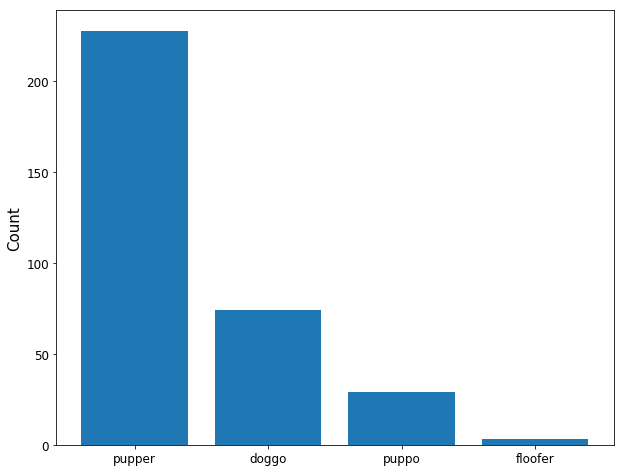

In [716]:
fig, ax = plt.subplots(figsize = (10, 8) )

ax.bar(df_master['dog_type'].value_counts().index, df_master['dog_type'].value_counts())
ax.set_ylabel('Count', fontsize = 15)
ax.tick_params(labelsize=12)

In [717]:
df_master['dog_type'].value_counts()

pupper     228
doggo      74 
puppo      29 
floofer    3  
Name: dog_type, dtype: int64

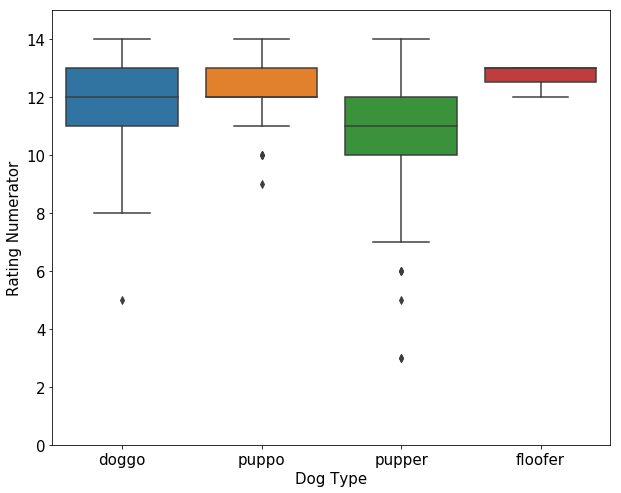

In [718]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (10, 8))

sns.boxplot(x='dog_type', y='rating_numerator', data=df_master)
ax.set_ylim(0,15)
ax.set_ylabel('Rating Numerator', fontsize=15)
ax.set_xlabel('Dog Type', fontsize=15)
plt.tick_params(labelsize=15)

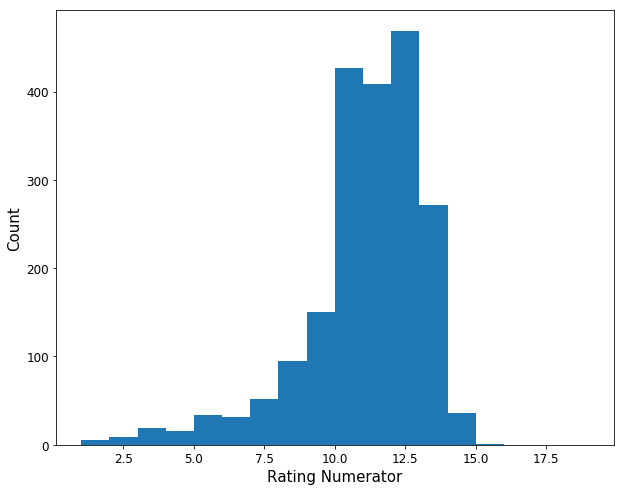

In [725]:
fig, ax = plt.subplots(figsize = (10, 8) )

ax.hist(df_master['rating_numerator'], bins = range(1,20))
ax.set_ylabel('Count', fontsize = 15)
ax.set_xlabel('Rating Numerator', fontsize = 15)
ax.tick_params(labelsize=12)

**Note:** There are some ratings where the denominator is NOT 10. But these are so few they do not have a significant effect on the shape of the above histogram.

In [724]:
p_not10 = sum(df_master['rating_denominator'].value_counts() != 10)/len(df_master)
print("% of ratings with denominator != 10 : " , round(p_not10*100,2), "%")

% of ratings with denominator != 10 :  0.68 %


In [726]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2044
Data columns (total 28 columns):
tweet_id                      2045 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2045 non-null datetime64[ns]
source                        2045 non-null object
text                          2045 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2045 non-null object
rating_numerator              2045 non-null int64
rating_denominator            2045 non-null int64
name                          1990 non-null object
dog_type                      334 non-null object
jpg_url                       2045 non-null object
img_num                       2045 non-null int64
p1                            2045 non-null object
p1_conf                       

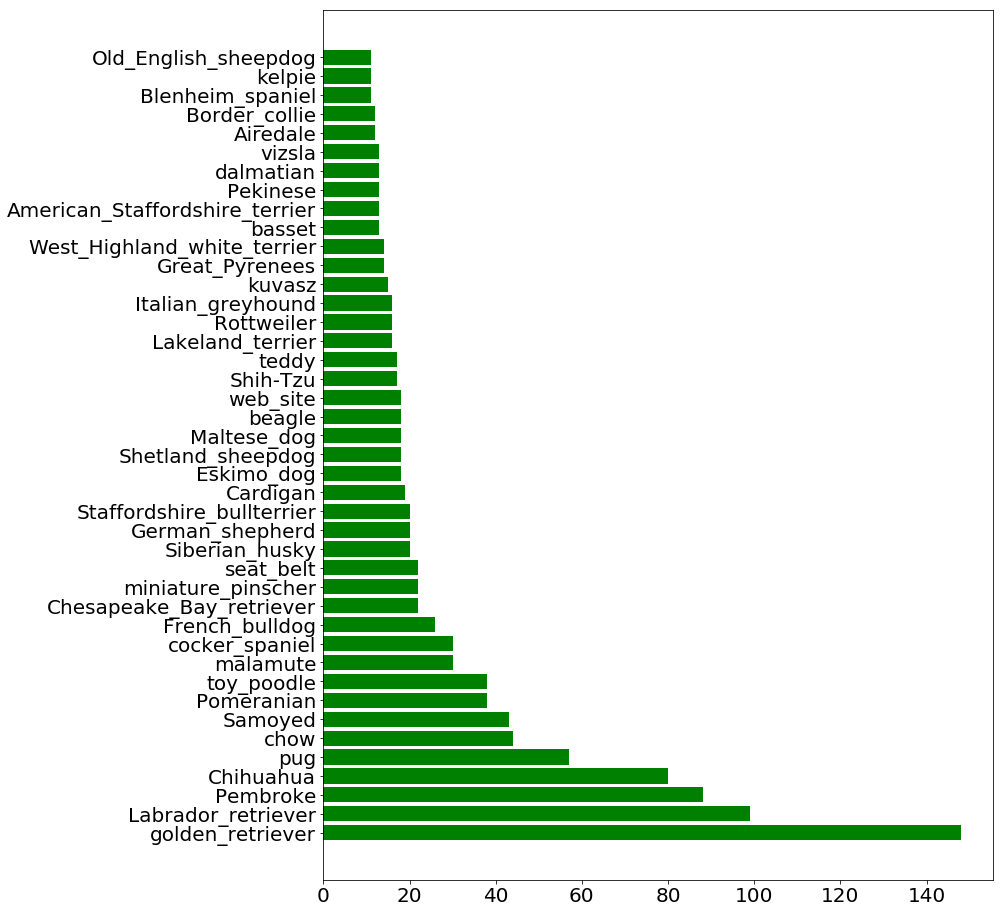

In [727]:
fig, ax = plt.subplots(figsize = (12, 16))

df_popular_dogs = df_master['p1'].value_counts()
df_popular_dogs = df_popular_dogs[df_popular_dogs > 10]

plt.barh(df_popular_dogs.index, df_popular_dogs, color = 'green')
plt.tick_params(labelsize = 20)

In [ ]:
# use resample to get daily summmaries for 
daily_tweet_count = df_master.resample('D', on='timestamp').count()['timestamp']          # number of tweets made each day
daily_retweet_sum = df_master.resample('D', on='timestamp').sum()['retweet_count']      # total number of retweets by day
daily_favorite_sum = df_master.resample('D', on='timestamp').sum()['favorite_count']    # total number of favorites by day

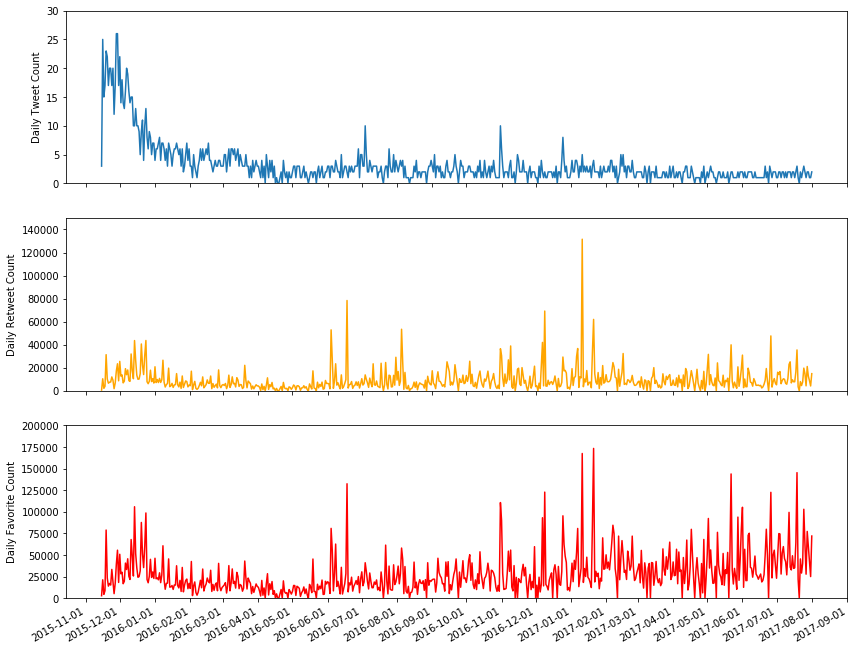

In [728]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize = (14,12) )

months = MonthLocator()  # every month
date_fmt = DateFormatter('%Y-%m-%d')

ax0.plot(daily_tweet_count.index, daily_tweet_count)
ax0.set_ylabel('Daily Tweet Count')
ax0.set_ylim(0,30)
ax0.xaxis.set_major_locator(months)
ax0.xaxis.set_major_formatter(date_fmt)

ax1.plot(daily_retweet_sum.index, daily_retweet_sum, 'orange')
ax1.set_ylabel('Daily Retweet Count')
ax1.set_ylim(0,150000)
ax1.xaxis.set_major_locator(months)
ax1.xaxis.set_major_formatter(date_fmt)

ax2.plot(daily_favorite_sum.index, daily_favorite_sum, 'red')
ax2.set_ylabel('Daily Favorite Count')
ax2.set_ylim(0,200000)
ax2.xaxis.set_major_locator(months)
ax2.xaxis.set_major_formatter(date_fmt)

fig.autofmt_xdate();